In [20]:
# Imports
#!pip install --upgrade sympy
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as lg
from scipy.linalg import expm, norm
import math
from math import exp
from sympy import *

In [2]:
# variables
h = 1
y0 = 1
t0 = 0
tf = 1
N = 3
gErr = []
igErr = []
dimension = 2
A = np.ones([dimension, dimension])

In [3]:
# 1.1
# y_o*e^{tA}

def exact_eulerstep(t):
    return y0 * expm(A * t)

def eulerstep(A, uold, h):
    unew = uold + h*A*uold    
    return unew 


In [4]:
# 1.2

def eulerint(A, y0, t0, tf, N):
    uold = y0
    for i in range(N):
        uold = eulerstep(A, uold, ((tf-t0)/N));
    approx = uold
    err = y0*expm((tf-t0)*A) - approx
    return approx, err 
    

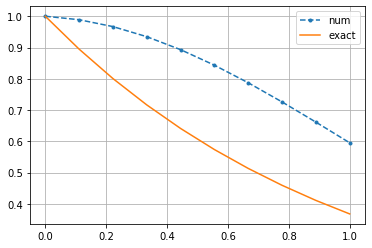

In [5]:
# Plot 1.2 

#e1, e2 = [], []
#for i,t in enumerate(time):
#    e1.append(eulerstep(A, exact_eulerstep(t0), (t-t0)/N))
#    e2.append(exact_eulerstep(t))
#print(e1)

y0 = 1
t0 = 0
tf = 1
h = 1
L = -1
N = 10
uold = y0*exp(L*t0)
time = np.linspace(t0, tf, N)

f = []
g = []
for i,t in enumerate(time):
#    if i == 0:
#        f.append(uold + ((t)/N)*L*uold)
#    else:
#        f.append(uold + ((t-(time[i-1])/N)*L*uold))
    f.append(uold + ((t-t0)/N)*L*uold)
    g.append(y0*exp(L*(t-t0)))
    uold = f[i]

plt.plot(time, f, ".--", label="num")
plt.plot(time, g, label="exact")
plt.legend(loc="best")
plt.grid()
plt.show()

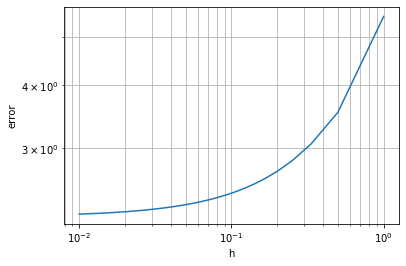

In [6]:
# 1.3

gErr = []
def errVSh(A, y0, t0, tf):
    n = 10**2
    N = np.linspace(y0, n, n)
    h = (tf-t0)/N;
    i = 0
    globalErr = []
    
    for i in range(len(N)):
        err = eulerint(A, y0, t0, tf, i)[1]
        globalErr.append(norm(err))
        i += 1
    gErr = globalErr
    plt.grid(True, which="both")
    plt.ylabel("error")
    plt.xlabel("h")
    plt.loglog(h, globalErr)
    return gErr

gErr = errVSh(A, y0, t0, tf)


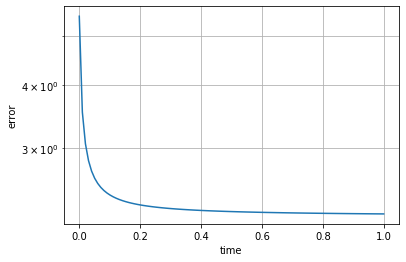

In [7]:
# 1.4
N = 10**2
time = np.linspace(t0, tf, N)
plt.ylabel("error")
plt.xlabel("time")
plt.yscale('log')
plt.grid(True, which="both")
plt.plot(time, gErr)
plt.show()

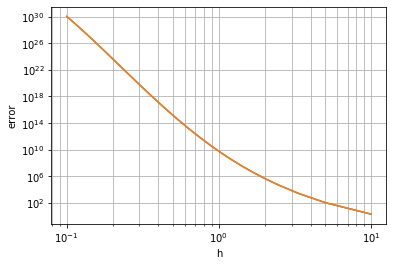

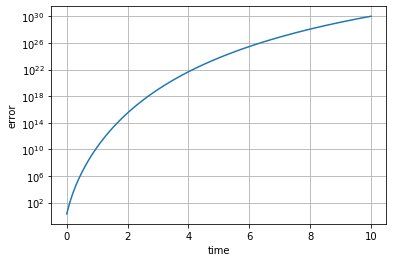

In [8]:
# 1.5

A = np.array([[-1, 10], [0, -3]])
y0 = np.array([1,1])#[np.newaxis].transpose()
t0 = 0
tf = 10

new_err = errVSh(A, y0, t0, tf)

N = 10**2
time = np.linspace(t0, tf, N)
plt.figure()
plt.ylabel("error")
plt.xlabel("time")
plt.yscale('log')
plt.grid(True, which="both")
plt.plot(time, new_err)
plt.show()

In [9]:
# 1.6 

def ieulerstep(A, uold, h):
    unew = (np.identity(len(A)) - h*A) / uold 
    return unew 

def ieulerint(A, y0, t0, tf, N):
    uold = y0
    for i in range(N):
        uold = ieulerstep(A, uold, ((tf-t0)/N))
    approx = uold
    err = y0*expm(A*(tf-t0)) - approx
    return approx, err

def ierrVSh(A, y0, t0, tf):
    n = 10**2
    N = np.linspace(y0, n, n)
    h = (tf-t0)/N;
    i = 0
    globalErr = []
    
    for i in range(len(N)):
        err = ieulerint(A, y0, t0, tf, i)[1]
        globalErr.append(norm(err))
        i += 1
    igErr = globalErr
    plt.grid(True, which="both")
    plt.ylabel("error")
    plt.xlabel("h")
    plt.loglog(h, globalErr)
    return igErr


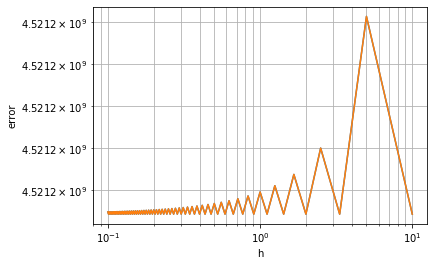

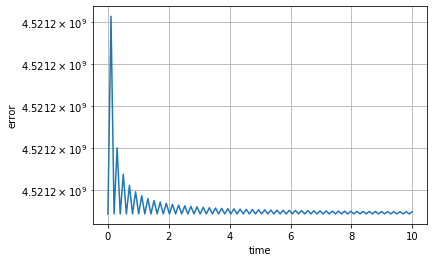

In [10]:
# 1.6 testing

A = np.array([[-1, 100], [1, -30]])
y0 = np.array([1,1])#[np.newaxis].transpose()
t0 = 0
tf = 10
N = 10**2
time = np.linspace(t0, tf, N)

new_ierr = ierrVSh(A, y0, t0, tf)

plt.figure()
plt.ylabel("error")
plt.xlabel("time")
plt.yscale('log')
plt.grid(True, which="both")
plt.plot(time, new_ierr)
plt.show()

In [11]:
# 1.7



In [12]:
# 2.1

def f(t, u):
    f = yn

def RK4step(f, uold, told, h):

    yp1 = f(told, uold)
    yp2 = f(told + h/2, uold + h*yp1/2)
    yp3 = f(told + h/2, uold + h*yp2/2)
    yp4 = f(told + h, uold + h*yp3)

    unew = uold + h/6 * (yp1 + 2*yp2 + 2*yp3 + yp4)

    return unew

In [13]:
# 2.2 

def RK34step(f, uold, told, h):

    yp1 = f(told, uold)
    yp2 = f(told + h/2, uold + h*yp1/2)
    yp3 = f(told + h/2, uold + h*yp2/2)
    z3 = f(told + h, uold - h*y1 + 2*h*y2)
    yp4 = f(told + h, uold + h*yp3)

    unew = uold + h/6 * (yp1 + 2*yp2 + 2*yp3 + yp4)
    err = (h/6)*(2*y2 + z3 - 2*y3 - y4)

    return unew, err

In [14]:
# 2.3

def newstep(tol, err, errold, hold, k):
    newr = norm(err);
    oldr = norm(errold);
    hnew = (tol/newr)^(2/(3*k)) * (tol/oldr)^((-1)/(3*k)) * hold
    return hnew

In [15]:
# 2.4

def adaptiveRK34(f, y0, t0, tf, tol):

    hold = abs(tf-t0)*tol^(1/4)/(100*(1+norm(f(t0, y0))))
    errold = tol
    uold = y0

    y = []
    t = []
    y.append(y0)
    t.append(t0)

    while t[-1] < tf:
        err = RK34step(f, uold, t[-1], hold)[1]
        hold = newstep(tol, err, errold, hold, 4)
        uold, errold = RK34step(f, uold, t[-1], hold)
        y.append(uold)
        t.append(t[-1]+hold)

    h = tf - t[-2]
    y[-1] = RK34step(f, y[-2], t[-1], h)
    t[-1] = tf
    return t, y

In [16]:
# 3 lotka

def lotka(t, u):
    a = 3
    b = 9
    c = 15
    d = 15
    
    dudt = [a*u(1)-b*u(1)*u(2), c*u(1)*u(2)-d*u(2)]
    return dudt

In [23]:
# 3 Part 1 (x and y as function of t)
y0 = [1, 1]
tol = 10**11
t0 = 0;
tf = 12;
t, f, yn, u, y = symbols('t f yn u y')
t, y = adaptiveRK34(f, y0, t0, tf, tol)

f = lotka(t, u)

plt.figure()
plt.plot(t, y);
xlabel('time');
ylabel('rel pop');


TypeError: 'Symbol' object is not callable

In [ ]:

# Part 2 (y as fun of x)
figure(2);
hold on;
plot(y(1,:),y(2,:),'b');
xlabel('Relativ population kaniner');
ylabel('Relativ population rävar');

% Part 3: Change initial conditions
figure(3);
y0 = [10 ; 1];
[t,y] = adaptiveRK34(f,y0,t0,tf,tol);
plot(t,y,[0 0],[0 0],'w',[0 0],[0 0],'w');
xlabel('Tid');
ylabel('Relativ population');
l = legend('Kaniner', 'R\"avar', '$y_0 = [10; 1]$', 'tol = $1\cdot 10^{-11}$', 'Location', 'NorthWest');
set(l, 'Interpreter', 'latex');

% Phase portrait for new initial condition
figure(2);
plot(y(1,:),y(2,:),'r');

% Let y0 = [d/c, a/b] (equilibrium)
figure(4);
y0 = [1 ; 0.3333];
[t,y] = adaptiveRK34(f,y0,t0,tf,tol);
plot(t,y,[0 0],[0 0],'w',[0 0],[0 0],'w');
xlabel('Tid');
ylabel('Relativ population');
l = legend('Kaniner', 'R\"avar', '$y_0 = [1; 0.3333]$', 'tol = $1\cdot 10^{-11}$', 'Location', 'NorthWest');
set(l, 'Interpreter', 'latex');

% Phase portrait for new initial condition
figure(2);
plot(y(1,:),y(2,:),'g',[0 0], [0 0], 'w');
l = legend('$y_0 = [1; 1]$', '$y_0 = [10; 1]$', '$y_0 = [1; 0.3333]$', 'tol = $1\cdot 10^{-11}$', 'Location', 'NorthEast');
set(l, 'Interpreter', 'latex');

% Part 4
figure(5);
tf = 500;
y0 = [1; 1];
tol = 1E-8;
[t,y] = adaptiveRK34(f,y0,t0,tf,tol);
H = @(x,y) 15.*x + 9.*y - 15.*log(x) - 3.*log(y);
plot(t,abs(H(y(1,:),y(2,:))./H(y0(1),y0(2))-1));
hold on;
p2  = plot([0 0], [0 0], 'w');
xlabel('Tid');
ylabel('$|H(x,y)/H(0,0) - 1|$', 'Interpreter', 'latex');
l = legend(p2, 'tol = $1\cdot 10^{-11}$', 'Location', 'NorthWest');
set(l, 'Interpreter', 'latex');